# KMEANS CLUSTERING TECHNIQUES

## Data Preparation


In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [56]:
# Resize all the figures
plt.rcParams["figure.figsize"] = [6, 4]

In [57]:
# Maximum visibility on all the columns
pd.set_option('display.max_columns', None)

In [58]:
# Load data
df_original = pd.read_csv('../Churn/churn_clean.csv')

In [59]:
df_original.shape

(10000, 50)

In [1]:
# df_original.info()

In [61]:
df_original.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [62]:
# Create a new data set with 4 variables to be used in the cluster analysis
df = df_original[['Age','Income','Children','Bandwidth_GB_Year']]
df.head()

,Age,Income,Children,Bandwidth_GB_Year
0,68,28561.99,0,904.536110
1,27,21704.77,1,800.982766
2,50,9609.57,4,2054.706961
3,48,18925.23,1,2164.579412
4,83,40074.19,0,271.493436


In [63]:
#Make a copy of DF
df_cls = df.copy()

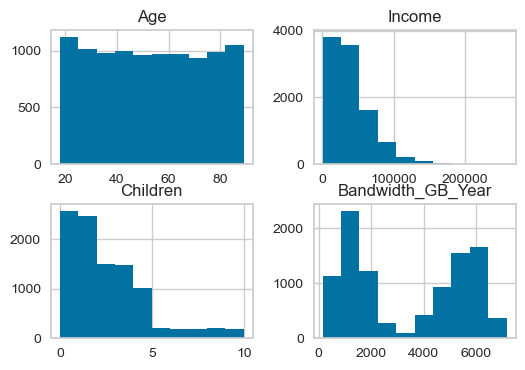

In [64]:
# Looking for outliers
df_cls.hist();

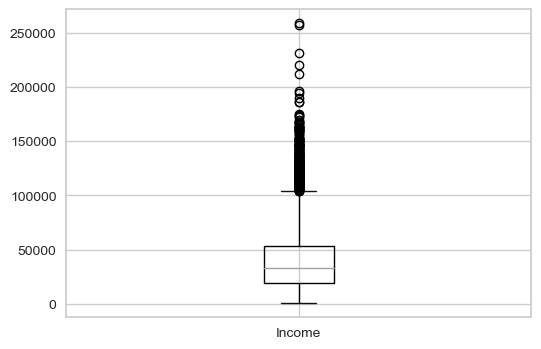

In [65]:
df_cls.boxplot('Income');

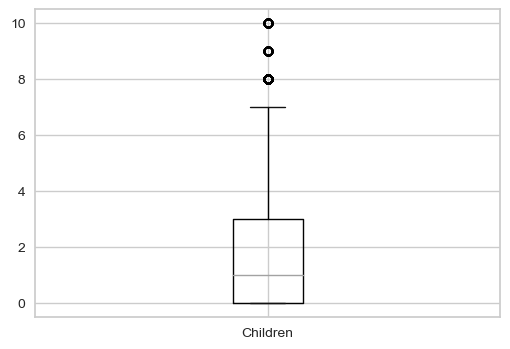

In [66]:
df_cls.boxplot('Children');

##### Outlier mitigation for children and income

In [67]:
# Check the mean of children
df_cls['Children'].mean()

2.0877

In [68]:
# Replace the outliers of children with the mean
df_cls['Children'].replace([7,8,9,10],2,inplace=True)

In [69]:
# Check if outliers are replaced
sum(df_cls['Children']>7)

0

In [70]:
df_cls.query('Income > 100000').count()[1]

395

In [71]:
df_cls['Income'].mean()

39806.9267710001

In [72]:
# Replace outliers of income with the mean
df_cls.loc[df_cls['Income']>100000,'Income'] = df_cls['Income'].mean()

In [73]:
sum(df_cls['Income']>100000)

0

In [74]:
# Checking null values
df_cls.isnull().sum()

Age                  0
Income               0
Children             0
Bandwidth_GB_Year    0
dtype: int64

In [75]:
# Checking duplicates
df_cls.duplicated().sum()

0

In [76]:
scaler = StandardScaler()
scaler.fit(df_cls)
scaled_df = scaler.transform(df_cls)
scaled_df

array([[ 0.72092524, -0.36059058, -1.1530925 , -1.13848703],
       [-1.25995716, -0.67314566, -0.48486551, -1.18587584],
       [-0.14873045, -1.22445016,  1.51981548, -0.61213775],
       ...,
       [-0.24535886,  0.43348626, -0.48486551,  0.35098358],
       [-0.6801867 , -0.90274298, -0.48486551,  1.40771348],
       [-1.21164295, -1.25128108, -0.48486551,  1.12816258]])

In [77]:
# Save preprocessed data
df_cleaned = pd.DataFrame(scaled_df)
df_cleaned.to_csv('cleaned_data.csv')

## Cluster Analysis



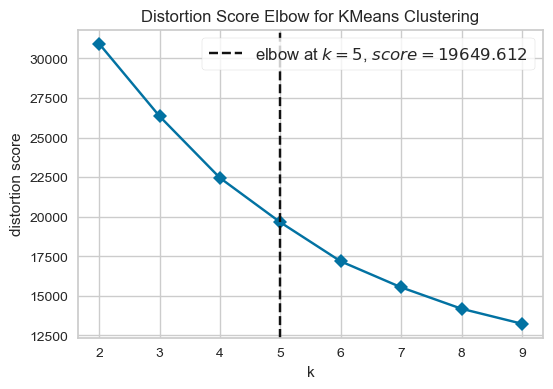

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [78]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), random_state=42, timings=False)

visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


** Below third party code was taken from scikit. [Source Code](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)

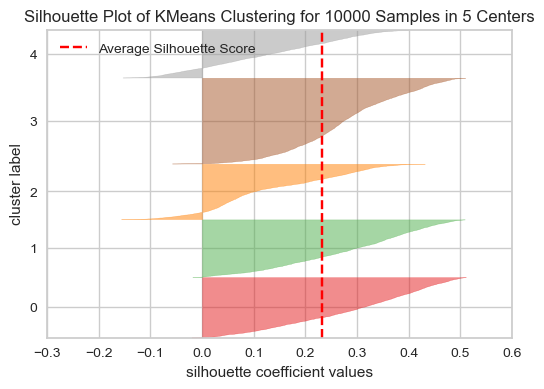

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 10000 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
# Silhouette Visualizer

model = SilhouetteVisualizer(KMeans(5))
model.fit(scaled_df)
model.show()

In [137]:
# Cluster the data using 5 clusters
model = KMeans(n_clusters=5, random_state=0).fit(scaled_df)
labels = model.labels_
labels

array([0, 0, 2, ..., 1, 1, 1], dtype=int32)

In [138]:
# Centroids 
centroids = model.cluster_centers_
centroids

array([[-0.01035884, -0.40872128, -0.55541918, -0.97782097],
       [-0.88539932, -0.31576684, -0.22341491,  0.9839649 ],
       [ 0.00402456, -0.2136351 ,  1.49768876, -0.38224095],
       [-0.01938213,  1.71033006, -0.1680412 , -0.16929745],
       [ 0.95429827, -0.26258888, -0.2460099 ,  0.93082093]])

In [139]:
silhouette = silhouette_score(scaled_df,labels)
print('Silhouette score is:',silhouette)

Silhouette score is: 0.23191625784563838


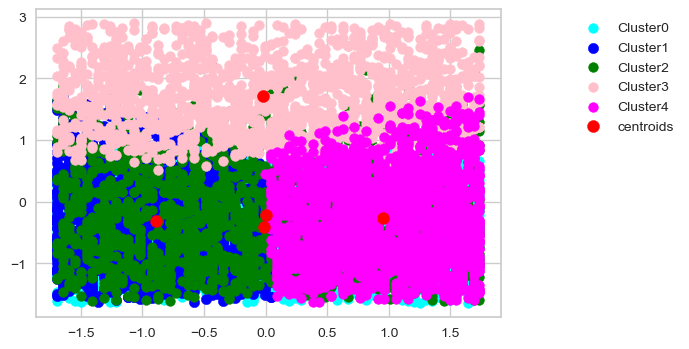

In [140]:
# plotting clusters
plt.scatter(scaled_df[labels==0,0], scaled_df[labels==0,1],
           s=50, c='cyan', label='Cluster0')

plt.scatter(scaled_df[labels==1,0], scaled_df[labels==1,1],
           s=56, c='blue', label='Cluster1')

plt.scatter(scaled_df[labels==2,0], scaled_df[labels==2,1],
           s=50, c='green', label='Cluster2')

plt.scatter(scaled_df[labels==3,0], scaled_df[labels==3,1],
           s=50, c='pink', label='Cluster3')

plt.scatter(scaled_df[labels==4,0], scaled_df[labels==4,1],
           s=50, c='magenta', label='Cluster4')
# plotting centroids
plt.scatter(centroids[:,0], centroids[:,1],
           s=75, c='red', label='centroids')

plt.legend(loc=1, bbox_to_anchor=(1.4,1));

In [141]:
# Glue clusters back to original data
df_original['Clusters'] = labels
df_original.sample(1)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Clusters
2524,2525,Z11338,e3149c44-e005-4ffe-b89a-55fac8d6d43a,8555f2e04e82aa3f464c0de8d725b48b,Wausau,WI,Marathon,54403,45.03138,-89.51375,24447,Urban,America/Chicago,Insurance risk surveyor,0,47,21028.18,Divorced,Female,Yes,14.10578,10,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Electronic Check,2.067128,255.1555,864.371328,4,4,4,3,3,4,3,3,0


In [142]:
# Check if Clusters are uniformly distributed
print('Cluster 0 count is:',df_original.query('Clusters == 0').count()[0])
print('Cluster 1 count is:',df_original.query('Clusters == 1').count()[0])
print('Cluster 2 count is:',df_original.query('Clusters == 2').count()[0])
print('Cluster 3 count is:',df_original.query('Clusters == 3').count()[0])
print('Cluster 4 count is:',df_original.query('Clusters == 4').count()[0])

Cluster 0 count is: 2793
Cluster 1 count is: 1973
Cluster 2 count is: 1808
Cluster 3 count is: 1546
Cluster 4 count is: 1880


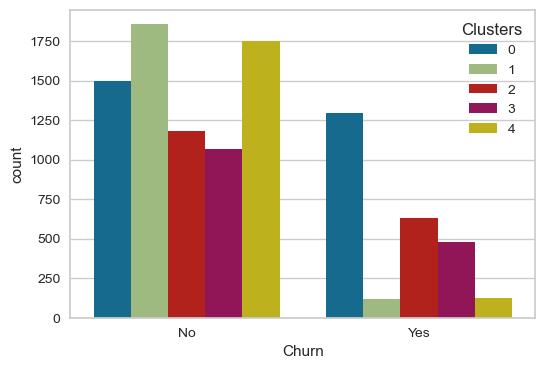

In [143]:
# Churn and Clusters
sns.countplot(x=df_original['Churn'],  hue=df_original['Clusters']);

In [144]:
# Churn count per Cluster
pd.crosstab(df_original['Clusters'],df_original['Churn'])

Churn,No,Yes
Clusters,,
0,1495,1298
1,1856,117
2,1179,629
3,1066,480
4,1754,126


In [145]:
# Percentage of Churn per Cluster
pd.crosstab(df_original['Clusters'],df_original['Churn'],normalize='index')

Churn,No,Yes
Clusters,,
0,0.535267,0.464733
1,0.940699,0.059301
2,0.652102,0.347898
3,0.689521,0.310479
4,0.932979,0.067021


In [146]:
# Streaming Movies count per Clusters
pd.crosstab(df_original['Clusters'],df_original['StreamingMovies'], normalize='index')

StreamingMovies,No,Yes
Clusters,,
0,0.512710,0.487290
1,0.510390,0.489610
2,0.518805,0.481195
3,0.518758,0.481242
4,0.495213,0.504787


In [147]:
# Streaming Movies percentage per Clusters
pd.crosstab(df_original['Clusters'],df_original['Phone'],normalize='index')


Phone,No,Yes
Clusters,,
0,0.091658,0.908342
1,0.098327,0.901673
2,0.090155,0.909845
3,0.100906,0.899094
4,0.087234,0.912766


In [148]:
# Online Backup percentage and Clusters
pd.crosstab(df_original['Clusters'],df_original['OnlineBackup'],normalize='index')

OnlineBackup,No,Yes
Clusters,,
0,0.568564,0.431436
1,0.540801,0.459199
2,0.554204,0.445796
3,0.553040,0.446960
4,0.522340,0.477660


In [149]:
# Internet Service percentage per Clusters
pd.crosstab(df_original['Clusters'],df_original['InternetService'],normalize='index')

InternetService,DSL,Fiber Optic,None
Clusters,,,
0,0.332259,0.460795,0.206946
1,0.367968,0.437405,0.194627
2,0.325774,0.449115,0.225111
3,0.359638,0.407503,0.232859
4,0.353191,0.434043,0.212766


In [150]:
# Techie and Clusters
pd.crosstab(df_original['Clusters'],df_original['Techie'],normalize='index')

Techie,No,Yes
Clusters,,
0,0.821697,0.178303
1,0.834769,0.165231
2,0.839602,0.160398
3,0.833118,0.166882
4,0.836702,0.163298


In [151]:
# Percentage of Contract types per Clusters
pd.crosstab(df_original['Clusters'],df_original['Contract'],normalize='index')

Contract,Month-to-month,One year,Two Year
Clusters,,,
0,0.546366,0.215539,0.238095
1,0.538773,0.207805,0.253421
2,0.551991,0.211283,0.236726
3,0.558862,0.204398,0.236740
4,0.534574,0.208511,0.256915


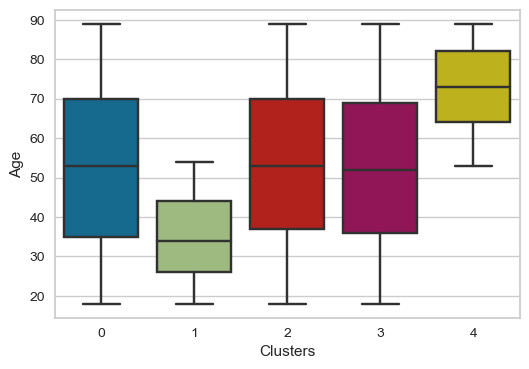

In [166]:
# Tenure and Cluster
sns.boxplot(x='Clusters', y='Age', data=df_original);

In [167]:
# Average age per Cluster
df_original.groupby('Clusters')['Age'].mean()

Clusters
0    52.875045
1    34.761784
2    53.186947
3    52.669470
4    72.835106
Name: Age, dtype: float64

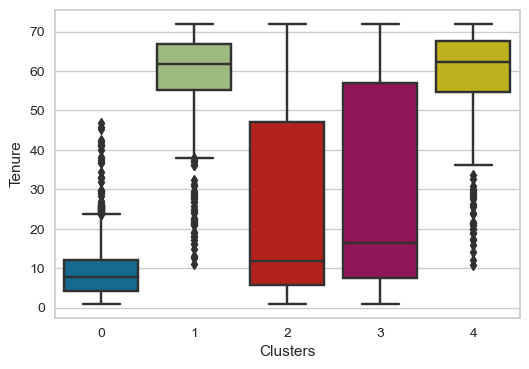

In [153]:
# Tenure and Cluster
sns.boxplot(x='Clusters', y='Tenure', data=df_original);

In [154]:
# Average Tenure by Cluster
df_original.groupby('Clusters')['Tenure'].mean()

Clusters
0     8.832381
1    59.908986
2    23.716672
3    30.030895
4    60.151652
Name: Tenure, dtype: float64

In [155]:
# Average Monthly Charge per Cluster
df_original.groupby('Clusters')['MonthlyCharge'].mean()

Clusters
0    172.123448
1    173.093938
2    171.327025
3    171.428492
4    175.109213
Name: MonthlyCharge, dtype: float64

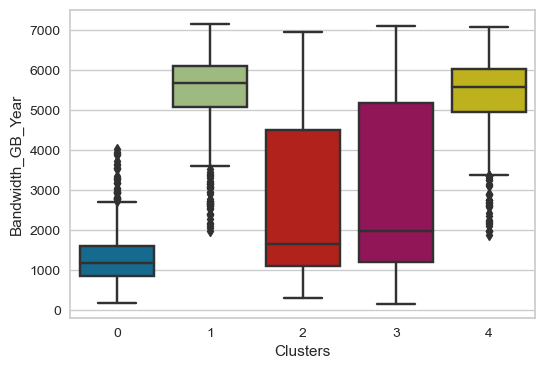

In [156]:
# Bandwidth usage and Clusters
sns.boxplot(x='Clusters',y='Bandwidth_GB_Year', data=df_original);

In [157]:
# Average Bandwidth usage per Cluster
df_original.groupby('Clusters')['Bandwidth_GB_Year'].mean()

Clusters
0    1255.315812
1    5538.788314
2    2550.565599
3    3024.267527
4    5426.781325
Name: Bandwidth_GB_Year, dtype: float64

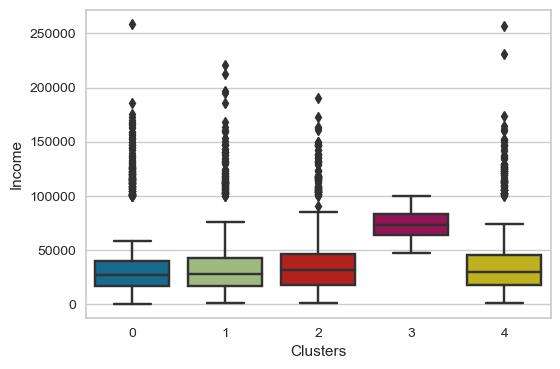

In [158]:
# Average Income and Clusters
sns.boxplot(x='Clusters', y='Income', data=df_original);

In [159]:
df_original.groupby('Clusters')['Income'].mean()

Clusters
0    31536.429792
1    33331.033391
2    35684.958728
3    73986.058422
4    34747.361021
Name: Income, dtype: float64

In [160]:
df_original.groupby('Clusters')['Population'].mean()

Clusters
0     9928.309345
1    10053.307653
2     9284.327987
3     9687.798836
4     9700.679787
Name: Population, dtype: float64

In [161]:
df_original.groupby('Clusters')['Children'].mean()

Clusters
0    1.345149
1    1.917385
2    3.969027
3    1.959897
4    1.665426
Name: Children, dtype: float64

In [162]:
df_original.groupby('Clusters')['Outage_sec_perweek'].mean()

Clusters
0    10.031008
1     9.988561
2     9.981995
3     9.942291
4    10.040540
Name: Outage_sec_perweek, dtype: float64

In [163]:
df_original.groupby('Clusters')['Contacts'].mean()

Clusters
0    1.001432
1    0.983781
2    0.981748
3    0.984476
4    1.014362
Name: Contacts, dtype: float64

In [164]:
df_original.groupby('Clusters')['Email'].mean()

Clusters
0    12.114930
1    11.982767
2    12.009956
3    11.948254
4    11.965426
Name: Email, dtype: float64

In [165]:
df_original.groupby('Clusters')['Yearly_equip_failure'].mean()

Clusters
0    0.393842
1    0.389255
2    0.408186
3    0.407503
4    0.395745
Name: Yearly_equip_failure, dtype: float64